## Practica 2 - Parte 1
### Perceptron

#### Importar librerías:

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import tabulate

#### Dataset:
Cargamos el dataset de iris de la libreria sklearn, al cargar load_iris en iris obtenemos diferentes sets de informacion, guardamos la informacion que nos interesa en un daframe de pandas.

Elimino del dataset los de target = 2 por que solo tenemos que diferenciar entre 2 tipos de iris

In [2]:
np.random.seed(1234)
tf.random.set_seed(1234)
iris = datasets.load_iris()
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

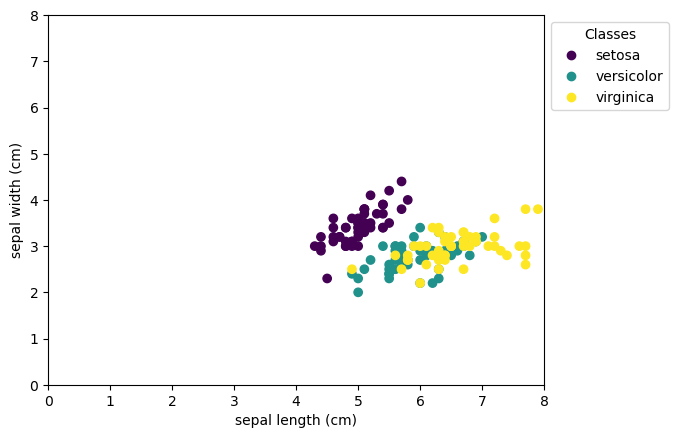

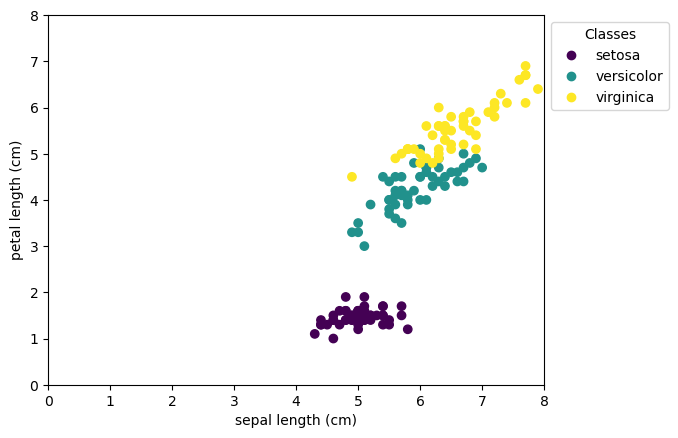

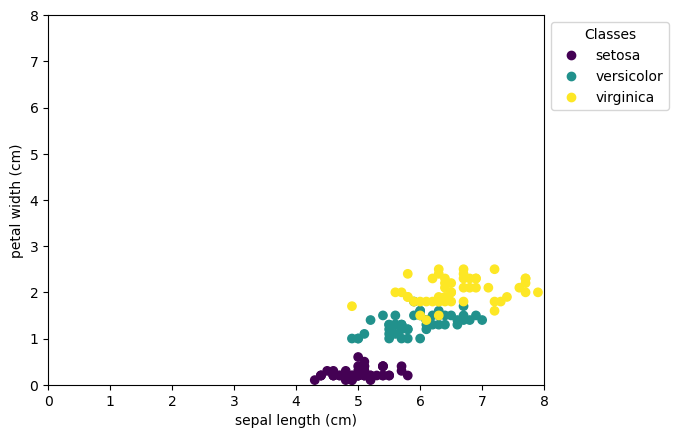

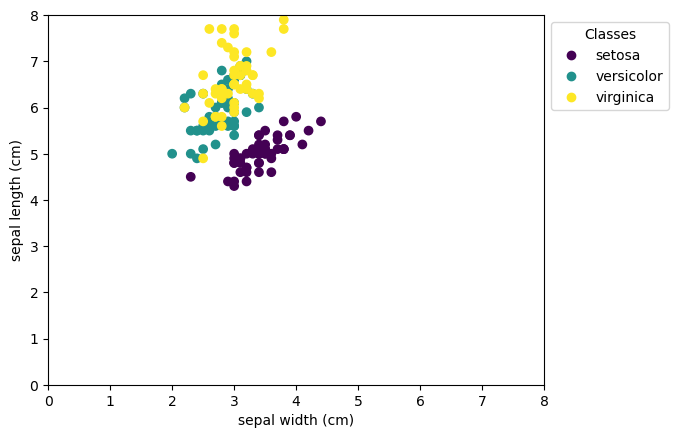

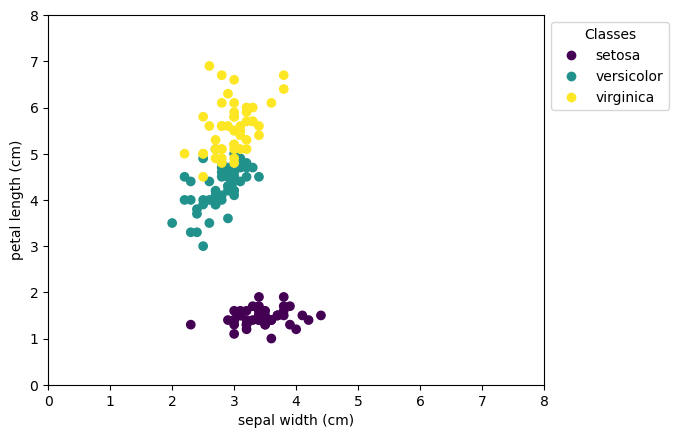

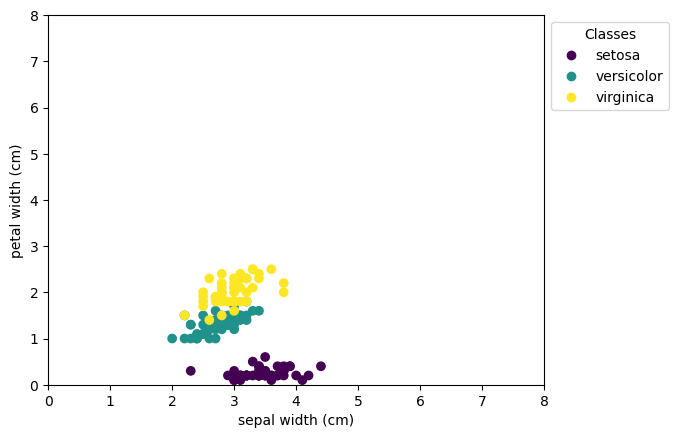

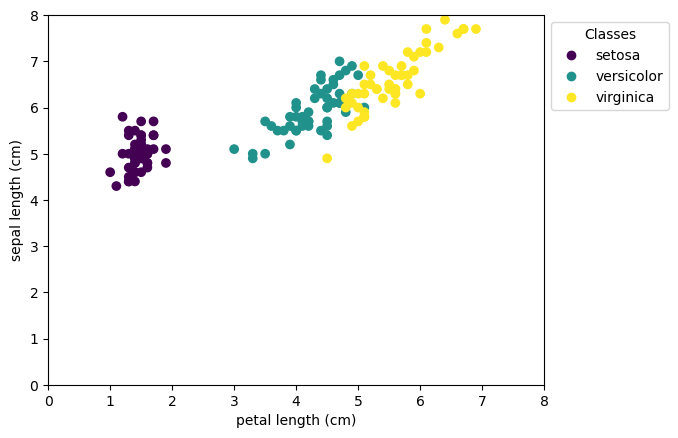

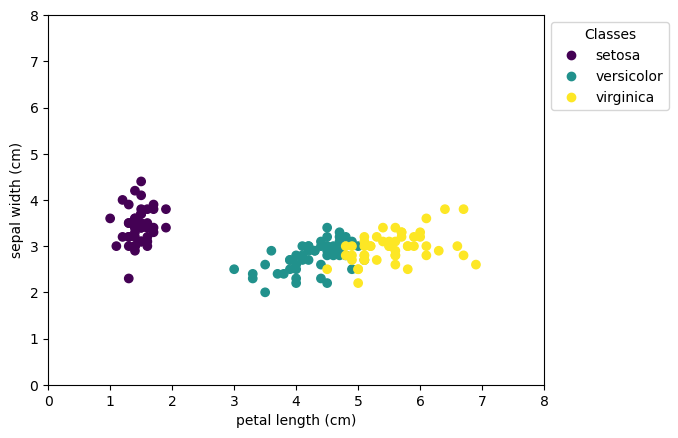

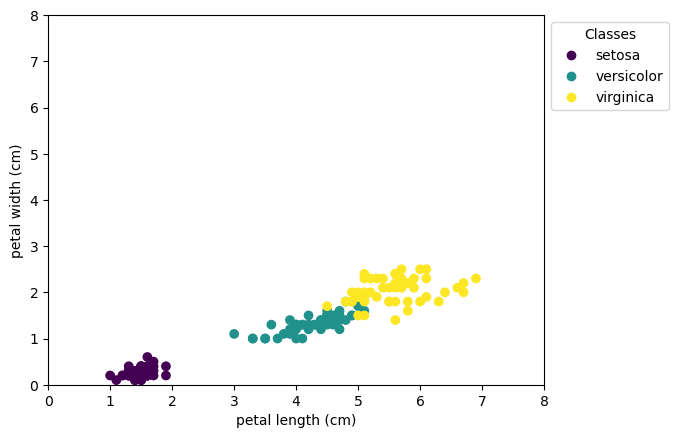

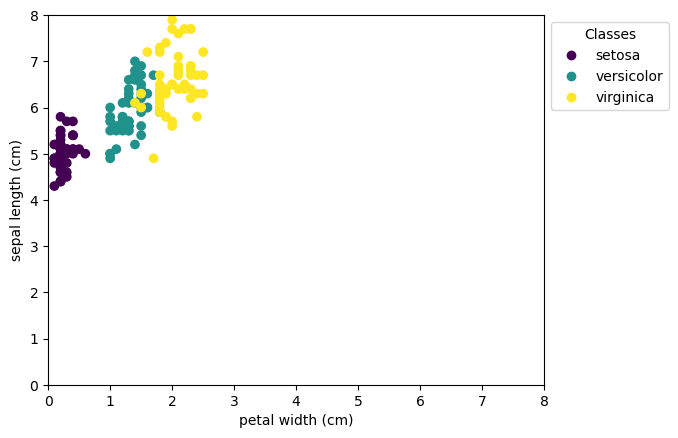

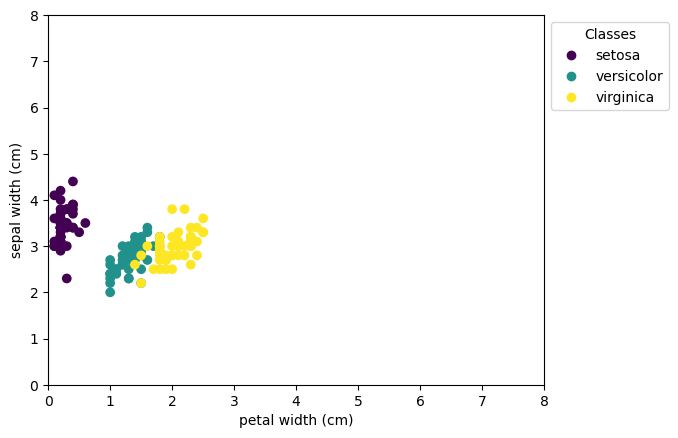

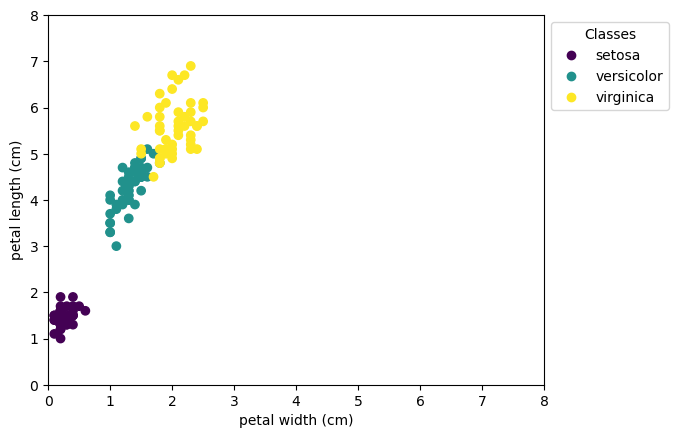

In [3]:
for i in range (0, 4):
    for j in range (0, 4):
        if i == j:
            continue
        _, ax = plt.subplots()
        scatter = ax.scatter(iris.data[:, i], iris.data[:, j], c=iris.target)
        ax.set(xlabel=iris.feature_names[i], ylabel=iris.feature_names[j])
        _ = ax.legend(
            scatter.legend_elements()[0], iris.target_names, loc="upper left", title="Classes", bbox_to_anchor=(1, 1)
        )
        plt.xlim(0, 8)
        plt.ylim(0, 8)


In [4]:

iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                        columns= iris['feature_names'] + ['target'])
print("Numero de elementos de cada clase")
print(iris_df['target'].value_counts())

iris_df = iris_df.query('target != 2')
# make all target 0 -1 only the target columns
iris_df

Numero de elementos de cada clase
target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1.0
96,5.7,2.9,4.2,1.3,1.0
97,6.2,2.9,4.3,1.3,1.0
98,5.1,2.5,3.0,1.1,1.0


In [5]:
iris_shuffleados = iris_df.copy().sample(frac=1, random_state=0)

tamañoIris = len(iris_shuffleados)
tamañoTrain = int(tamañoIris * 0.8)

iris_trainAll = iris_shuffleados.iloc[:tamañoTrain]
iris_testAll = iris_shuffleados.iloc[tamañoTrain:]

Setosa = 0


#### Variables para el perceptron:
Los pesos iniciales los hardcodeamos para asi asegurarnos replicacion de datos:

In [6]:
#pesosIniciales = tf.Variable(
    #tf.random.uniform([2, 1], minval=-1.0, maxval=1.0, dtype=tf.double))

#pesosIniciales = [[0.77264388],
#       [0.6640986 ]]
#pesosIniciales = tf.Variable(pesosIniciales)

In [7]:
iris_entrenamiento = tf.Variable(iris_trainAll.iloc[:, [0, 3, 4]].values)
iris_test = tf.Variable(iris_testAll.iloc[:, [0, 3, 4]].values)

In [8]:
data_list = []

##### Perceptron


In [31]:
from asyncio import sleep
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 

def salida_Perceptron(entradas, pesos, umbral):
    salida = 0.0
    for i in range(len(entradas)):
        salida += (entradas[i] * pesos[i])
    if salida >= umbral:
        return 1
    else:
        return 0

def entrenamiento_Perceptron(entradas, pesos, umbral, tasa_aprendizaje, salidas_esperadas):
    
    error_total = 0

    for i in range(len(salidas_esperadas)):
        
        error = (int(salidas_esperadas[i]) - salida_Perceptron(entradas[i], pesos, umbral))
        
        if error != 0:
            
            error_total = True

            entrada = entradas[i]

            for j in range(len(pesos)):
                
                pesos[j] = pesos[j] + (tasa_aprendizaje * error * entrada[j])

    return pesos, error_total

def Perceptron(entradas, salidas, umbrales, tasa_aprendizaje, num_iteraciones):
    mejores_config = []
    for tasa in tasa_aprendizaje:

        for umbral in umbrales:
            
            pesos_actuales = []

            for _ in range(len(entradas[0])):

                pesos_actuales.append(random.uniform(-1, 1))
                
            for epoch in range(num_iteraciones):  # Iterar sobre las épocas
            
                pesos_actuales, error = entrenamiento_Perceptron(entradas, np.array(pesos_actuales), umbral, tasa, salidas)

                if not error:
                    config = {
                        "tasa_aprendizaje":tasa,
                        "umbral":umbral,
                        "epocas":epoch+1,
                        "pesos":np.array(pesos_actuales)
                    }
                    mejores_config.append(config)
                    break 
            
    return mejores_config

##### Comprobar resultados 

In [10]:
iris_entrenamiento = tf.Variable(iris_trainAll.iloc[:, [0, 3, 4]].values)
iris_test = tf.Variable(iris_testAll.iloc[:, [0, 3, 4]].values)
datos_entrenamiento = np.array(iris_entrenamiento[:, :-1])
target_entrenamiento = np.array(iris_entrenamiento[:, -1])
epochs = 400

datos_test = iris_test[:, :-1]
indices_test = iris_test[:, -1]

learning_rates = [0.1, 0.01, 0.001]
umbrales = [0.1, 0.3 , 0.5]

mejores_config_2 = Perceptron(datos_entrenamiento, target_entrenamiento, umbrales, learning_rates, epochs)

----------------------------------------------------
Mejor conjunto de hiperparámetros:
Tasa de aprendizaje:0.1
Umbral:0.1
Épocas del mejor conjunto:181
Pesos del mejor conjunto:[-0.06865887  0.61266446]


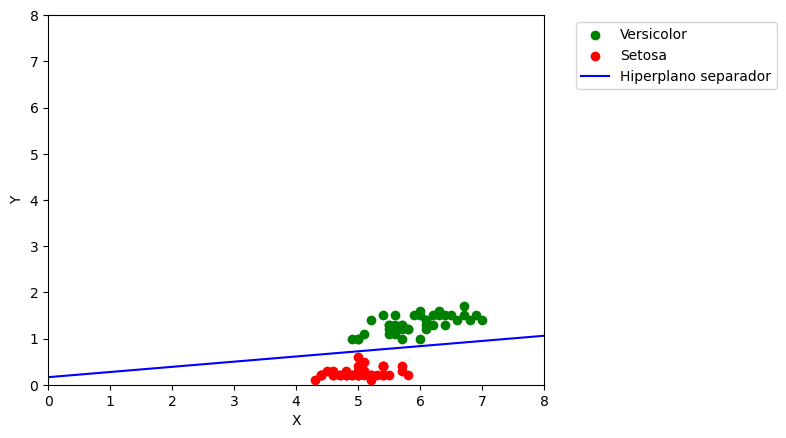

----------------------------------------------------
Mejor conjunto de hiperparámetros:
Tasa de aprendizaje:0.1
Umbral:0.3
Épocas del mejor conjunto:48
Pesos del mejor conjunto:[-0.07634081  0.8816935 ]


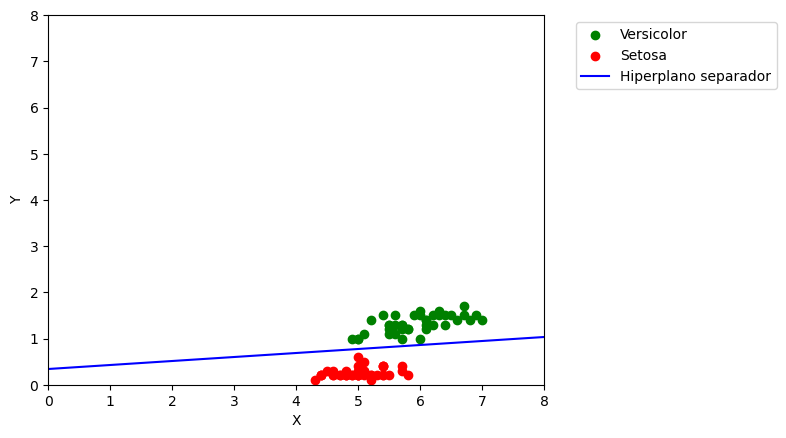

----------------------------------------------------
Mejor conjunto de hiperparámetros:
Tasa de aprendizaje:0.1
Umbral:0.5
Épocas del mejor conjunto:92
Pesos del mejor conjunto:[-0.03457901  0.96700926]


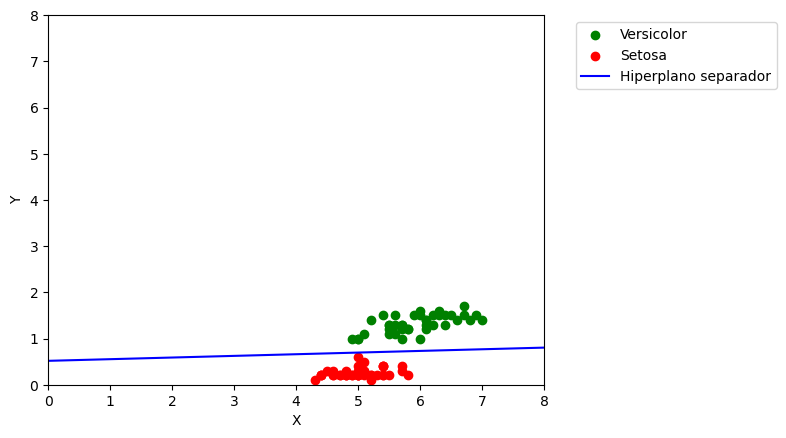

----------------------------------------------------
Mejor conjunto de hiperparámetros:
Tasa de aprendizaje:0.01
Umbral:0.1
Épocas del mejor conjunto:3
Pesos del mejor conjunto:[-0.09670234  0.90912373]


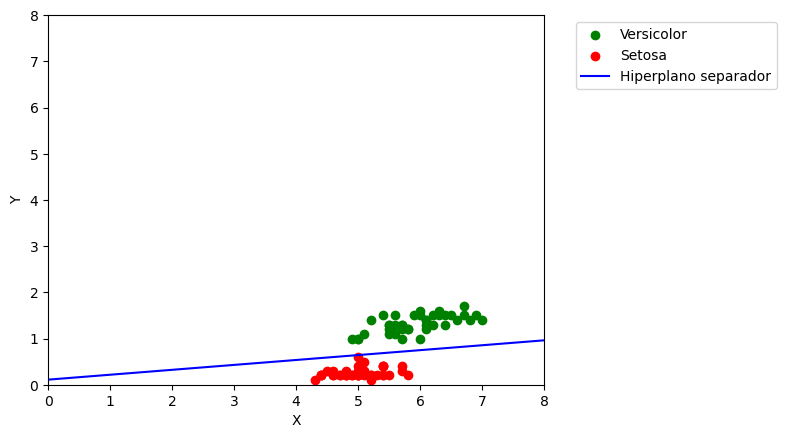

----------------------------------------------------
Mejor conjunto de hiperparámetros:
Tasa de aprendizaje:0.01
Umbral:0.3
Épocas del mejor conjunto:32
Pesos del mejor conjunto:[-0.02032181  0.49934544]


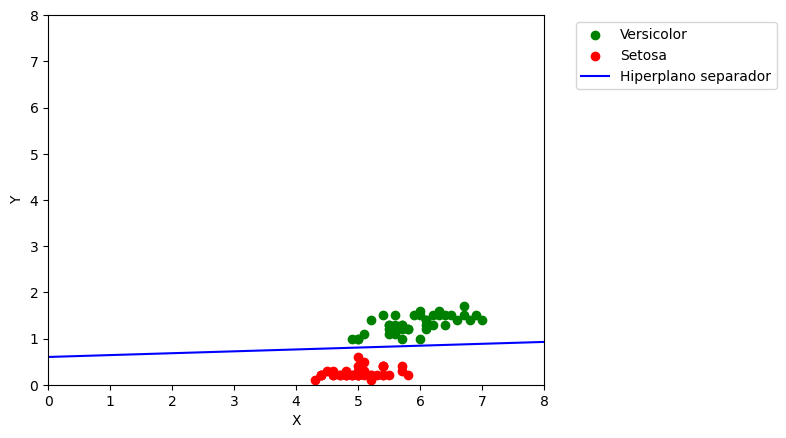

----------------------------------------------------
Mejor conjunto de hiperparámetros:
Tasa de aprendizaje:0.01
Umbral:0.5
Épocas del mejor conjunto:146
Pesos del mejor conjunto:[-0.07084125  0.94451639]


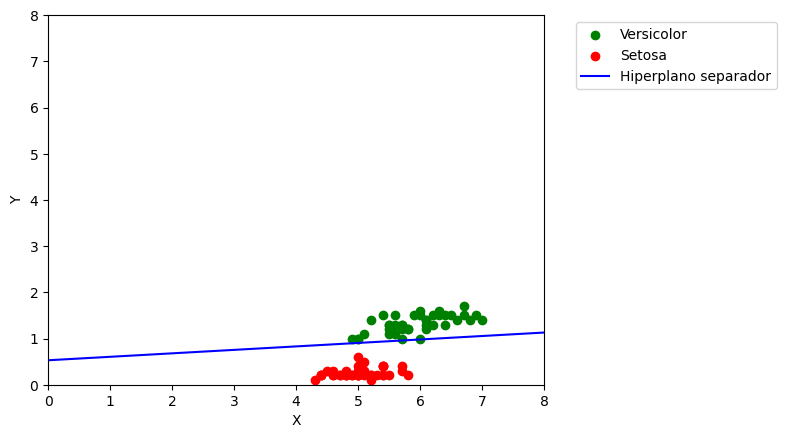

----------------------------------------------------
Mejor conjunto de hiperparámetros:
Tasa de aprendizaje:0.001
Umbral:0.1
Épocas del mejor conjunto:183
Pesos del mejor conjunto:[-0.03336217  0.3925589 ]


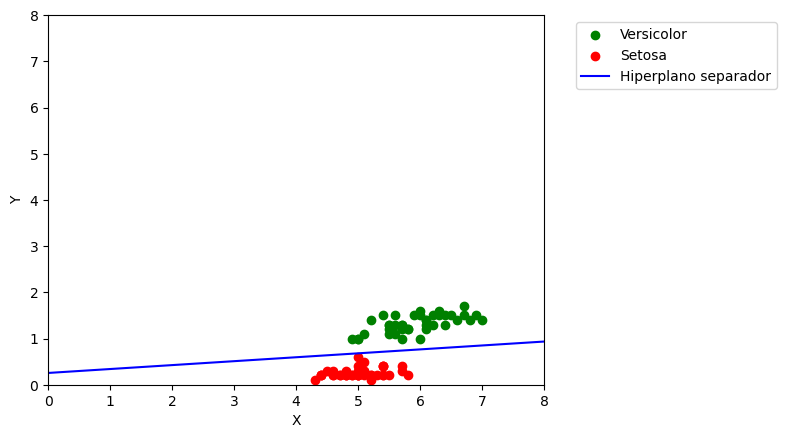

----------------------------------------------------
Mejor conjunto de hiperparámetros:
Tasa de aprendizaje:0.001
Umbral:0.3
Épocas del mejor conjunto:186
Pesos del mejor conjunto:[-0.03429829  0.72427164]


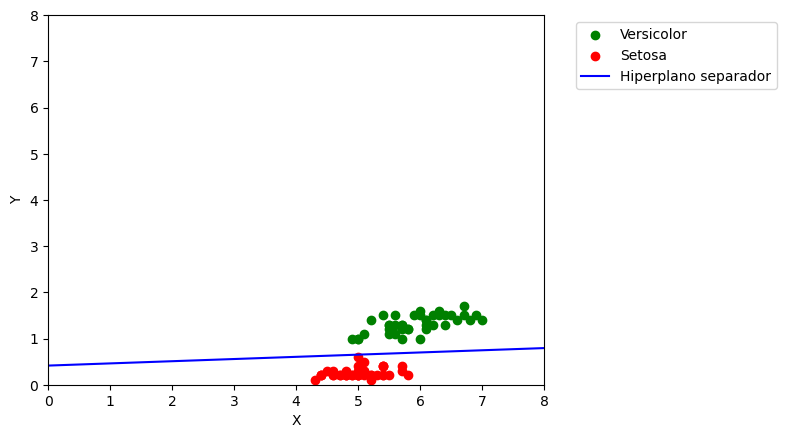

----------------------------------------------------
Mejor conjunto de hiperparámetros:
Tasa de aprendizaje:0.001
Umbral:0.5
Épocas del mejor conjunto:311
Pesos del mejor conjunto:[0.00787014 0.61361823]


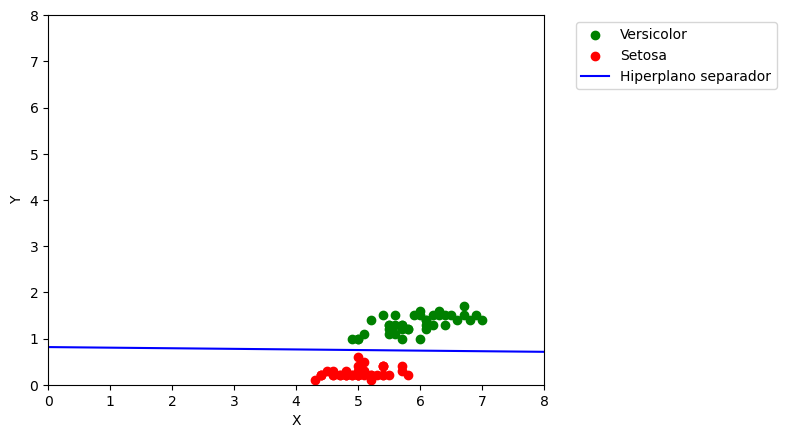

In [11]:
for config in mejores_config_2:
        print("----------------------------------------------------")
        print("Mejor conjunto de hiperparámetros:")
        print("Tasa de aprendizaje:" + str(config["tasa_aprendizaje"]))
        print("Umbral:" + str(config["umbral"]))
        print("Épocas del mejor conjunto:" + str(config["epocas"]))
        print("Pesos del mejor conjunto:" + str(config["pesos"]))

        # Pintar solo el mejor conjunto de hiperparámetros
        x = datos_entrenamiento[:, 0]
        y = datos_entrenamiento[:, 1]
        x_range = np.linspace(0, 8, 100)  # Extender el rango de x de 0 a 8

        aux_a = -(config["pesos"][0] / config["pesos"][1])
        aux_b = config["umbral"] / config["pesos"][1]
        y_line = (aux_a * x_range) + aux_b 

        # Pintar puntos de entrada según su salida
        plt.scatter(x[target_entrenamiento == 1], y[target_entrenamiento == 1], color='green', label='Versicolor')
        plt.scatter(x[target_entrenamiento == 0], y[target_entrenamiento == 0], color='red', label='Setosa')

        # Trazar la línea formada por los pesos y el umbral
        plt.plot(x_range, y_line, color='blue', label='Hiperplano separador')
        plt.xlabel('X')
        plt.ylabel('Y')

        # Establecer límites de los ejes x e y
        plt.xlim(0, 8)
        plt.ylim(0, 8)

        # Quitar la cuadrícula de la gráfica
        plt.grid(False)

        # Mostrar leyenda fuera del gráfico principal
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()

In [12]:
import pandas as pd

def save_data_to_csv(data_list):
    """
    Saves the given data list to a CSV file named 'training_data.csv'.

    Parameters:
    data_list (list): The list of data to be saved.

    Returns:
    None
    """
    df = pd.DataFrame(data_list)
    # Save the DataFrame to a CSV file
    df.to_csv("training_data.csv", index=False)

    print("Data saved to training_data.csv")


In [13]:
print(tabulate.tabulate(data_list, headers='keys', tablefmt='pretty', ))

#### Perceptron 3 entradas


In [24]:
iris_entrenamiento = tf.Variable(iris_trainAll.iloc[:, [0, 1, 2, 4]].values)
iris_test = tf.Variable(iris_testAll.iloc[:, [0, 1, 2, 4]].values)

In [32]:
datos_entrenamiento = np.array(iris_entrenamiento[:, :-1])
target_entrenamiento = np.array(iris_entrenamiento[:, -1])
epochs = 400

datos_test = iris_test[:, :-1]
indices_test = iris_test[:, -1]

learning_rates = [0.1, 0.01, 0.001]
umbrales = [0.1, 0.3 , 0.5]

mejores_config_3 = Perceptron(np.array(datos_entrenamiento), np.array(target_entrenamiento), umbrales, learning_rates, epochs)

----------------------------------------------------
Mejor conjunto de hiperparámetros:
Tasa de aprendizaje:0.1
Umbral:0.1
Épocas del mejor conjunto:2
Pesos finales:[ 0.48381164 -1.35634034  0.51827171]


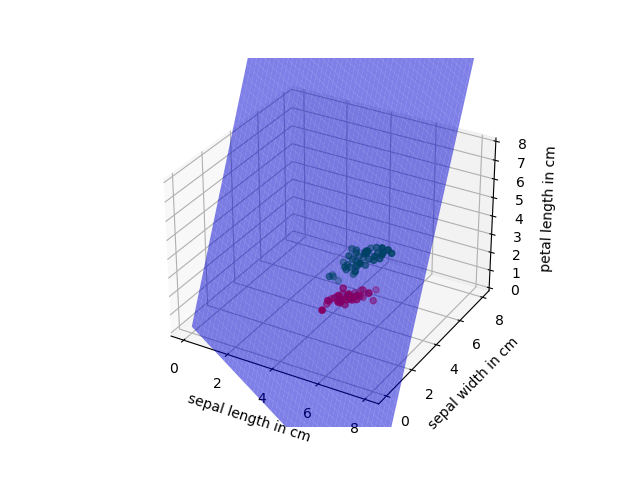

----------------------------------------------------
Mejor conjunto de hiperparámetros:
Tasa de aprendizaje:0.1
Umbral:0.3
Épocas del mejor conjunto:2
Pesos finales:[ 0.3277541  -1.01687361  0.86612663]


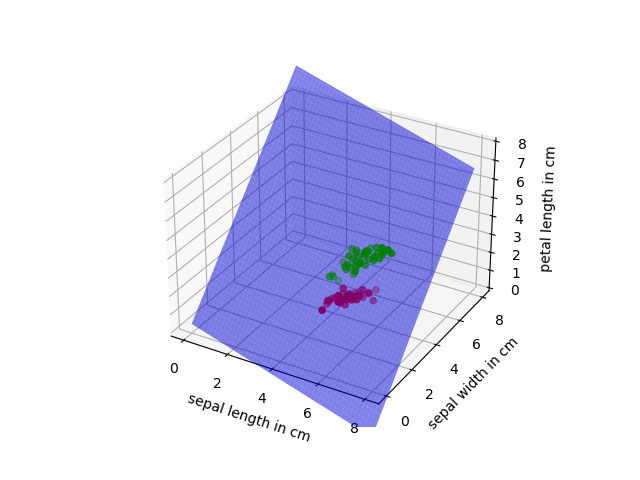

----------------------------------------------------
Mejor conjunto de hiperparámetros:
Tasa de aprendizaje:0.1
Umbral:0.5
Épocas del mejor conjunto:2
Pesos finales:[ 0.70655962 -1.5551344   0.43050448]


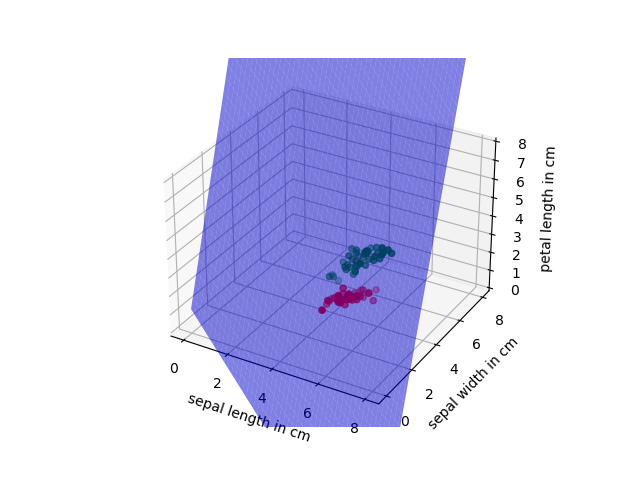

----------------------------------------------------
Mejor conjunto de hiperparámetros:
Tasa de aprendizaje:0.01
Umbral:0.1
Épocas del mejor conjunto:2
Pesos finales:[ 0.30237411 -0.90857536  0.53613038]


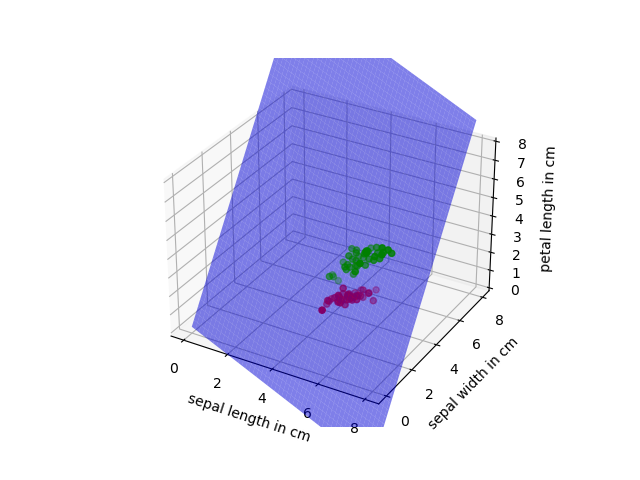

----------------------------------------------------
Mejor conjunto de hiperparámetros:
Tasa de aprendizaje:0.01
Umbral:0.3
Épocas del mejor conjunto:2
Pesos finales:[ 0.17049049 -0.36572181  0.1439865 ]


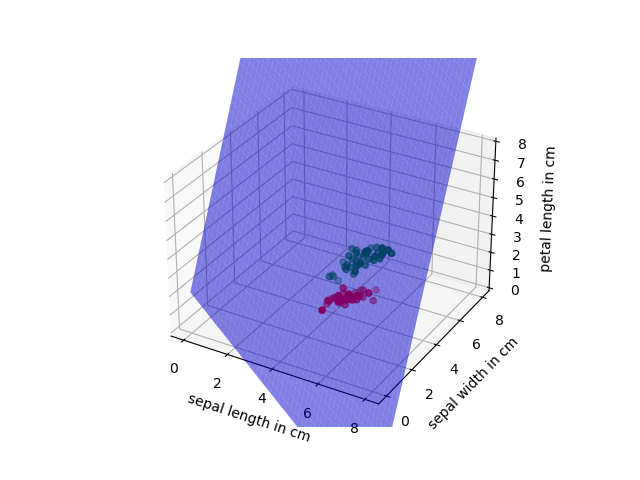

----------------------------------------------------
Mejor conjunto de hiperparámetros:
Tasa de aprendizaje:0.01
Umbral:0.5
Épocas del mejor conjunto:2
Pesos finales:[-0.32456087 -0.12912762  0.85304132]


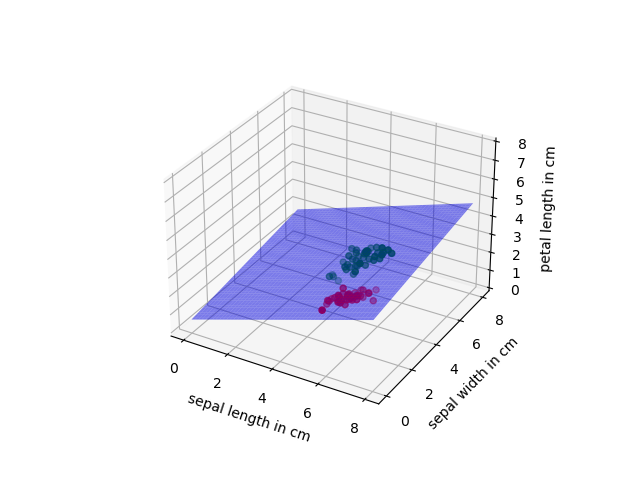

----------------------------------------------------
Mejor conjunto de hiperparámetros:
Tasa de aprendizaje:0.001
Umbral:0.1
Épocas del mejor conjunto:28
Pesos finales:[ 0.10239907 -0.16695657  0.01388759]


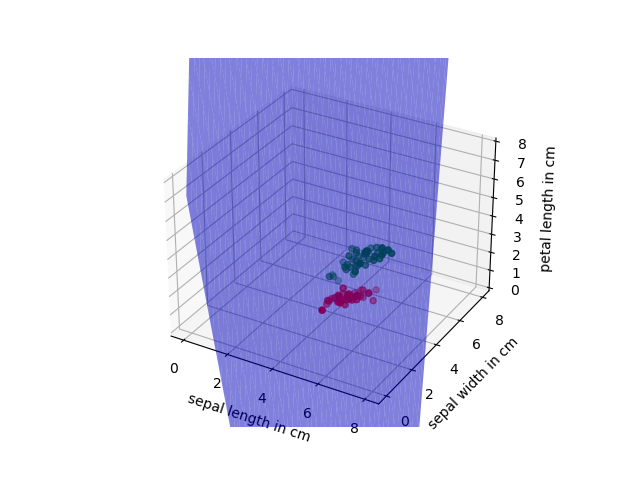

----------------------------------------------------
Mejor conjunto de hiperparámetros:
Tasa de aprendizaje:0.001
Umbral:0.3
Épocas del mejor conjunto:5
Pesos finales:[ 0.09301137 -0.12421464  0.05540151]


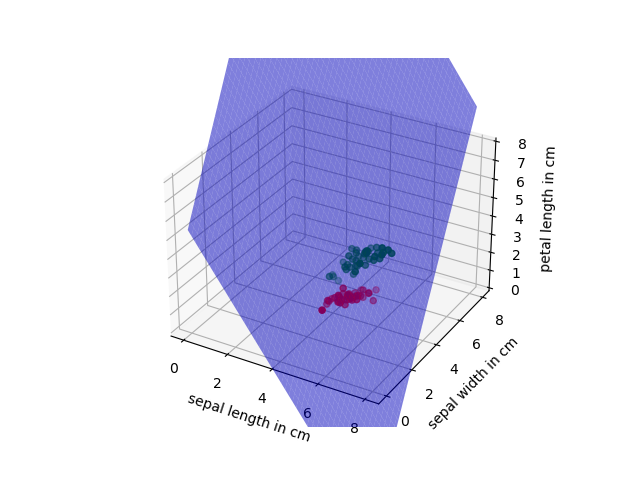

----------------------------------------------------
Mejor conjunto de hiperparámetros:
Tasa de aprendizaje:0.001
Umbral:0.5
Épocas del mejor conjunto:7
Pesos finales:[ 0.22981216 -0.30571092  0.12146523]


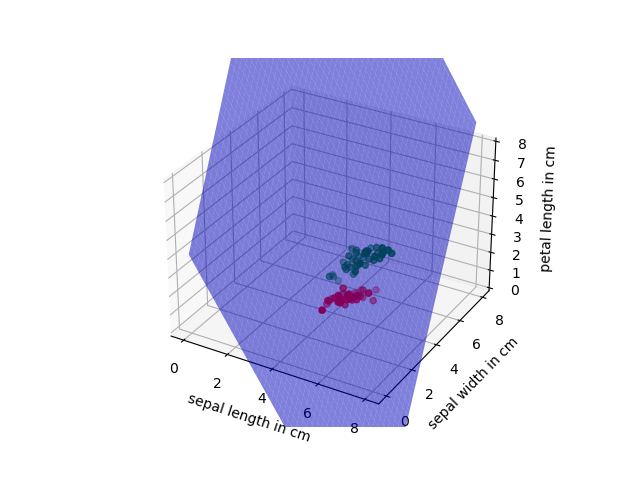

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Habilitar la visualización interactiva en JupyterLab o Anaconda
%matplotlib widget

for config in mejores_config_3:
    print("----------------------------------------------------")
    print("Mejor conjunto de hiperparámetros:")
    print("Tasa de aprendizaje:" + str(config["tasa_aprendizaje"]))
    print("Umbral:" + str(config["umbral"]))
    print("Épocas del mejor conjunto:" + str(config["epocas"]))
    print("Pesos finales:" + str(config["pesos"]))

    # Pintar solo el mejor conjunto de hiperparámetros
    x = datos_entrenamiento[:, 0]
    y = datos_entrenamiento[:, 1]
    z = datos_entrenamiento[:, 2]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x[target_entrenamiento == 1], y[target_entrenamiento == 1], z[target_entrenamiento == 1], color='green', label='Versicolor')
    ax.scatter(x[target_entrenamiento == 0], y[target_entrenamiento == 0], z[target_entrenamiento == 0], color='red', label='Setosa')

    # Definir el rango de valores para x, y, z
    x_range = np.linspace(0, 8, 100)
    y_range = np.linspace(0, 8, 100)
    x_range, y_range = np.meshgrid(x_range, y_range)

    # Calcular el valor de z (tercera dimensión) usando la ecuación del plano
    z_range = (config["umbral"] - config["pesos"][0] * x_range - config["pesos"][1] * y_range) / config["pesos"][2]

    ax.plot_surface(x_range, y_range, z_range, color='blue', alpha=0.5, label='Hiperplano separador')

    ax.set_xlabel('sepal length in cm')
    ax.set_ylabel('sepal width in cm')
    ax.set_zlabel('petal length in cm')

    ax.set_zlim(0, 8)  # Establecer límites del eje z

    plt.show()


### Perceptron con 3 entradas

In [17]:
iris_entrenamiento = tf.Variable(iris_trainAll.iloc[:, [0, 1, 2, 3, 4]].values)
iris_test = tf.Variable(iris_testAll.iloc[:, [0, 1, 2, 3, 4]].values)

In [18]:
datos_entrenamiento = np.array(iris_entrenamiento[:, :-1])
target_entrenamiento = np.array(iris_entrenamiento[:, -1])
epochs = 400

datos_test = iris_test[:, :-1]
indices_test = iris_test[:, -1]

learning_rates = [0.1, 0.01, 0.001]
umbrales = [0.1, 0.3 , 0.5]

mejores_config_4 = Perceptron(datos_entrenamiento, target_entrenamiento, umbrales, learning_rates, epochs)